## 02. 객체 내 연산

## 참고자료
* [Python 완전정복 시리즈] 2편 : Pandas DataFrame 완전정복 : https://wikidocs.net/book/7188

In [1]:
import pandas as pd
import numpy as np

## 반올림

In [3]:
col = ['col1','col2','col3']
row = ['row1','row2','row3']
data = np.random.rand(3,3)*100
df = pd.DataFrame(data=data, index=row, columns=col)
df

,col1,col2,col3
row1,1.633411,67.151779,19.564949
row2,18.048203,93.356294,76.220808
row3,19.688851,51.834411,46.999386


In [5]:
# decimals = 0인 경우, 일의 자릿수까지

df.round(0)

,col1,col2,col3
row1,2.0,67.0,20.0
row2,18.0,93.0,76.0
row3,20.0,52.0,47.0


In [6]:
# decimals > 0인 경우, 소수 n번째 자리까지

df.round(1)

,col1,col2,col3
row1,1.6,67.2,19.6
row2,18.0,93.4,76.2
row3,19.7,51.8,47.0


In [7]:
df.round(2)

,col1,col2,col3
row1,1.63,67.15,19.56
row2,18.05,93.36,76.22
row3,19.69,51.83,47.00


In [8]:
# decimals < 0 인 경우
# 양수인 경우 10의 n승까지 반올림

df.round(-1)

,col1,col2,col3
row1,0.0,70.0,20.0
row2,20.0,90.0,80.0
row3,20.0,50.0,50.0


In [9]:
df.round(-2)

,col1,col2,col3
row1,0.0,100.0,0.0
row2,0.0,100.0,100.0
row3,0.0,100.0,0.0


## 합계

In [13]:
col = ['col1','col2','col3']
row = ['row1','row2','row3']
data = [[1,2,3],[4,5,6],[7,np.NaN,9]]
df = pd.DataFrame(data=data,index=row,columns=col)
df

,col1,col2,col3
row1,1,2.0,3
row2,4,5.0,6
row3,7,NaN,9


In [14]:
# axis를 설정하여 더하기 수행

df.sum(axis=0)

col1    12.0
col2     7.0
col3    18.0
dtype: float64

In [15]:
df.sum(axis=1)

row1     6.0
row2    15.0
row3    16.0
dtype: float64

In [16]:
# skipna를 변경하여 NaN을 포함하는 경우 Nan 반환하도록 설정

df.sum(axis=0, skipna=False)

col1    12.0
col2     NaN
col3    18.0
dtype: float64

## 곱

In [18]:
col = ['col1','col2','col3']
row = ['row1','row2','row3']
data = [[1,2,3],[4,5,6],[7,np.NaN,9]]
df = pd.DataFrame(data=data,index=row,columns=col)
df

,col1,col2,col3
row1,1,2.0,3
row2,4,5.0,6
row3,7,NaN,9


In [20]:
df.prod(axis=0)

col1     28.0
col2     10.0
col3    162.0
dtype: float64

In [19]:
df.prod(axis=1)

row1      6.0
row2    120.0
row3     63.0
dtype: float64

In [21]:
# skipna=False로 설정하여 NaN시 NaN 반환

df.prod(axis=0, skipna=False)

col1     28.0
col2      NaN
col3    162.0
dtype: float64

In [22]:
# min_count를 변경하여 계산하기
df.prod(axis=1, min_count=3)

row1      6.0
row2    120.0
row3      NaN
dtype: float64

## 절대값

In [24]:
col = ['col1','col2','col3']
row = ['row1','row2','row3']
data = [[-1,2,-3.5],[4,-5.5, 3+4j],[7,np.NaN,0]]
df = pd.DataFrame(data=data,index=row,columns=col)
df

,col1,col2,col3
row1,-1,2.0,-3.5+0.0j
row2,4,-5.5,3.0+4.0j
row3,7,NaN,0.0+0.0j


In [25]:
df.abs()

,col1,col2,col3
row1,1,2.0,3.5
row2,4,5.5,5.0
row3,7,NaN,0.0


## 전치

In [29]:
col = ['col1','col2','col3']
row = ['row1','row2','row3','row4']
data = [['A',1,2],['B',3,4],['C',5,6],['D',7,8]]
df = pd.DataFrame(data=data,index=row,columns=col)
df

,col1,col2,col3
row1,A,1,2
row2,B,3,4
row3,C,5,6
row4,D,7,8


In [30]:
df.transpose()

,row1,row2,row3,row4
col1,A,B,C,D
col2,1,3,5,7
col3,2,4,6,8


## 순위

In [38]:
df['average']=df['Value'].rank(method='average')
df['min']=df['Value'].rank(method='min')
df['max']=df['Value'].rank(method='max')
df['first']=df['Value'].rank(method='first')
df['dense']=df['Value'].rank(method='dense')
df

,Value,average,min,max,first,dense
A★,5,6.0,5.0,7.0,5.0,4.0
B★,5,6.0,5.0,7.0,6.0,4.0
C,<NA>,NaN,NaN,NaN,NaN,NaN
D☆,3,3.5,3.0,4.0,3.0,3.0
E,-3.1,1.0,1.0,1.0,1.0,1.0
F★,5,6.0,5.0,7.0,7.0,4.0
G,0.4,2.0,2.0,2.0,2.0,2.0
H,6.7,8.0,8.0,8.0,8.0,5.0
I☆,3,3.5,3.0,4.0,4.0,3.0


In [39]:
df['keep']=df['Value'].rank(na_option='keep')
df['top']=df['Value'].rank(na_option='top')
df['bottom']=df['Value'].rank(na_option='bottom')
df['pct']=df['Value'].rank(pct=True)
df

,Value,average,min,max,first,dense,keep,top,bottom,pct
A★,5,6.0,5.0,7.0,5.0,4.0,6.0,7.0,6.0,0.7500
B★,5,6.0,5.0,7.0,6.0,4.0,6.0,7.0,6.0,0.7500
C,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,NaN
D☆,3,3.5,3.0,4.0,3.0,3.0,3.5,4.5,3.5,0.4375
E,-3.1,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.1250
F★,5,6.0,5.0,7.0,7.0,4.0,6.0,7.0,6.0,0.7500
G,0.4,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,0.2500
H,6.7,8.0,8.0,8.0,8.0,5.0,8.0,9.0,8.0,1.0000
I☆,3,3.5,3.0,4.0,4.0,3.0,3.5,4.5,3.5,0.4375


### 차이[이산] 

In [44]:
a = [1,2,3,4,5,6,7,8]
b = [1,2,4,8,16,32,64,128]
c = [8,7,6,5,4,3,2,1]
data = {"col1":a,"col2":b,"col3":c}
df = pd.DataFrame(data)

df

,col1,col2,col3
0,1,1,8
1,2,2,7
2,3,4,6
3,4,8,5
4,5,16,4
5,6,32,3
6,7,64,2
7,8,128,1


In [47]:
df.diff(axis=0)

,col1,col2,col3
0,NaN,NaN,NaN
1,1.0,1.0,-1.0
2,1.0,2.0,-1.0
3,1.0,4.0,-1.0
4,1.0,8.0,-1.0
5,1.0,16.0,-1.0
6,1.0,32.0,-1.0
7,1.0,64.0,-1.0


In [48]:
df.diff(axis=1)

,col1,col2,col3
0,NaN,0,7
1,NaN,0,5
2,NaN,1,2
3,NaN,4,-3
4,NaN,11,-12
5,NaN,26,-29
6,NaN,57,-62
7,NaN,120,-127


In [49]:
# +3이면 3칸 이전 값과 비교

df.diff(periods=3)

,col1,col2,col3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,3.0,7.0,-3.0
4,3.0,14.0,-3.0
5,3.0,28.0,-3.0
6,3.0,56.0,-3.0
7,3.0,112.0,-3.0


In [51]:
# -2이면 2칸 후의 값

df.diff(periods=-2)

,col1,col2,col3
0,-2.0,-3.0,2.0
1,-2.0,-6.0,2.0
2,-2.0,-12.0,2.0
3,-2.0,-24.0,2.0
4,-2.0,-48.0,2.0
5,-2.0,-96.0,2.0
6,NaN,NaN,NaN
7,NaN,NaN,NaN


## 차이(백분률)

In [61]:
a = [1,1,4,4,1,1]
b = [1,2,4,8,16,32]
c = [1,np.NaN,np.NaN,np.NaN,16,64]
data = {"col1":a,"col2":b,"col3":c}
df = pd.DataFrame(data)
df

,col1,col2,col3
0,1,1,1.0
1,1,2,NaN
2,4,4,NaN
3,4,8,NaN
4,1,16,16.0
5,1,32,64.0


In [62]:
df.pct_change()

,col1,col2,col3
0,NaN,NaN,NaN
1,0.00,1.0,0.0
2,3.00,1.0,0.0
3,0.00,1.0,0.0
4,-0.75,1.0,15.0
5,0.00,1.0,3.0


In [63]:
df.pct_change(periods=-1)

,col1,col2,col3
0,0.00,-0.5,0.0000
1,-0.75,-0.5,0.0000
2,0.00,-0.5,0.0000
3,3.00,-0.5,-0.9375
4,0.00,-0.5,-0.7500
5,NaN,NaN,NaN


In [64]:
df.pct_change(fill_method='bfill')

,col1,col2,col3
0,NaN,NaN,NaN
1,0.00,1.0,15.0
2,3.00,1.0,0.0
3,0.00,1.0,0.0
4,-0.75,1.0,0.0
5,0.00,1.0,3.0


In [70]:
df.pct_change(limit=2)

,col1,col2,col3
0,NaN,NaN,NaN
1,0.00,1.0,0.0
2,3.00,1.0,0.0
3,0.00,1.0,NaN
4,-0.75,1.0,NaN
5,0.00,1.0,3.0


## 누적계산

In [74]:
!pip3 install numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 8.5 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 9.1 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [75]:
import numba

data = {'col1':[1,2,3,4],'col2':[3,7,5,6]}
idx = ['row1','row2','row3','row4']
df = pd.DataFrame(data = data, index = idx)
df

,col1,col2
row1,1,3
row2,2,7
row3,3,5
row4,4,6


In [78]:
df.expanding().sum()

,col1,col2
row1,1.0,3.0
row2,3.0,10.0
row3,6.0,15.0
row4,10.0,21.0


In [79]:
df.expanding(min_periods=4).sum()

,col1,col2
row1,NaN,NaN
row2,NaN,NaN
row3,NaN,NaN
row4,10.0,21.0


In [80]:
df.expanding(axis=1).sum()

,col1,col2
row1,1.0,4.0
row2,2.0,9.0
row3,3.0,8.0
row4,4.0,10.0


In [82]:
df.expanding(method='table').sum(engine='numba')

,col1,col2
row1,1.0,3.0
row2,3.0,10.0
row3,6.0,15.0
row4,10.0,21.0


## 기간이동 계산

### 일정 범위에서 규칙적으로 연산(예: 이동평균)을 해야 할 경우 사용

##### 날마다 일주일 간의 주가 평균을 알고 싶을 때, 매일 일일히 다 계산하지 않고 이동평균 구함

In [83]:
period = pd.period_range(start='2022-01-13 00:00:00',end='2022-01-13 02:30:00',freq='30T')
data = {'col1':[1,2,3,4,5,6],'col2':period}
idx = ['row1','row2','row3','row4','row5','row6']
df = pd.DataFrame(data= data, index = idx)
df

,col1,col2
row1,1,2022-01-13 00:00
row2,2,2022-01-13 00:30
row3,3,2022-01-13 01:00
row4,4,2022-01-13 01:30
row5,5,2022-01-13 02:00
row6,6,2022-01-13 02:30


In [84]:
df.rolling(window=3).sum()

/var/folders/qb/9ghy845j1v999lxpxzlv__9r0000gn/T/ipykernel_8654/776325898.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['col2'], dtype='object')
  df.rolling(window=3).sum()


,col1
row1,NaN
row2,NaN
row3,6.0
row4,9.0
row5,12.0
row6,15.0


In [85]:
df.rolling(window=3, closed='left').sum()

/var/folders/qb/9ghy845j1v999lxpxzlv__9r0000gn/T/ipykernel_8654/3923861477.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['col2'], dtype='object')
  df.rolling(window=3, closed='left').sum()


,col1
row1,NaN
row2,NaN
row3,NaN
row4,6.0
row5,9.0
row6,12.0


In [86]:
df.rolling(window=3, closed='right').sum()

/var/folders/qb/9ghy845j1v999lxpxzlv__9r0000gn/T/ipykernel_8654/3687215863.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['col2'], dtype='object')
  df.rolling(window=3, closed='right').sum()


,col1
row1,NaN
row2,NaN
row3,6.0
row4,9.0
row5,12.0
row6,15.0


In [88]:
df.rolling(window=3, closed='both').sum()

/var/folders/qb/9ghy845j1v999lxpxzlv__9r0000gn/T/ipykernel_8654/3428113587.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['col2'], dtype='object')
  df.rolling(window=3, closed='both').sum()


,col1
row1,NaN
row2,NaN
row3,6.0
row4,10.0
row5,14.0
row6,18.0


In [89]:
df.rolling(window=3, closed='neither').sum()

/var/folders/qb/9ghy845j1v999lxpxzlv__9r0000gn/T/ipykernel_8654/2311605475.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['col2'], dtype='object')
  df.rolling(window=3, closed='neither').sum()


,col1
row1,NaN
row2,NaN
row3,NaN
row4,NaN
row5,NaN
row6,NaN


In [90]:
df.rolling(window=3, closed='neither', min_periods=2).sum()

/var/folders/qb/9ghy845j1v999lxpxzlv__9r0000gn/T/ipykernel_8654/1039418808.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['col2'], dtype='object')
  df.rolling(window=3, closed='neither', min_periods=2).sum()


,col1
row1,NaN
row2,NaN
row3,3.0
row4,5.0
row5,7.0
row6,9.0


In [91]:
df.rolling(window=3, win_type='triang').sum() # 삼각함수로 가중치 부여

/var/folders/qb/9ghy845j1v999lxpxzlv__9r0000gn/T/ipykernel_8654/220039830.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['col2'], dtype='object')
  df.rolling(window=3, win_type='triang').sum()


,col1
row1,NaN
row2,NaN
row3,4.0
row4,6.0
row5,8.0
row6,10.0


In [ ]:
df.rolling(window=3, win_type='gaussian').sum(std=3) # 가우시한 분포로 가중치 부여

In [92]:
df.rolling(window='60T', on='col2').sum()

,col1,col2
row1,1.0,2022-01-13 00:00
row2,3.0,2022-01-13 00:30
row3,5.0,2022-01-13 01:00
row4,7.0,2022-01-13 01:30
row5,9.0,2022-01-13 02:00
row6,11.0,2022-01-13 02:30


## 그룹화 계산

In [94]:
idx=['A','A','B','B','B','C','C','C','D','D','D','D','E','E','E']
col=['col1','col2','col3']
data = np.random.randint(0,9,(15,3))
df = pd.DataFrame(data=data, index=idx, columns=col).reset_index()
df

,index,col1,col2,col3
0,A,1,3,5
1,A,2,5,3
2,B,8,7,5
3,B,6,5,2
4,B,5,3,0
5,C,6,1,5
6,C,3,2,3
7,C,5,4,5
8,D,3,0,4
9,D,3,2,2


In [95]:
df.groupby('index')

In [96]:
df.groupby('index').mean()

,col1,col2,col3
index,,,
A,1.500000,4.000000,4.000000
B,6.333333,5.000000,2.333333
C,4.666667,2.333333,4.333333
D,3.250000,2.750000,4.000000
E,7.333333,4.000000,4.333333


In [97]:
df.groupby('index').count()

,col1,col2,col3
index,,,
A,2,2,2
B,3,3,3
C,3,3,3
D,4,4,4
E,3,3,3


In [98]:
df.groupby('index').agg(['sum', 'mean'])

col1           col2           col3          
       sum      mean  sum      mean  sum      mean
index                                             
A        3  1.500000    8  4.000000    8  4.000000
B       19  6.333333   15  5.000000    7  2.333333
C       14  4.666667    7  2.333333   13  4.333333
D       13  3.250000   11  2.750000   16  4.000000
E       22  7.333333   12  4.000000   13  4.333333

## 지수가중함수

In [99]:
data = {'val':[1,4,2,3,2,5,13,10,12,14,np.NaN,16,12,20,22]}
df = pd.DataFrame(data).reset_index()
df

,index,val
0,0,1.0
1,1,4.0
2,2,2.0
3,3,3.0
4,4,2.0
5,5,5.0
6,6,13.0
7,7,10.0
8,8,12.0
9,9,14.0


In [103]:
import matplotlib.pyplot as plt

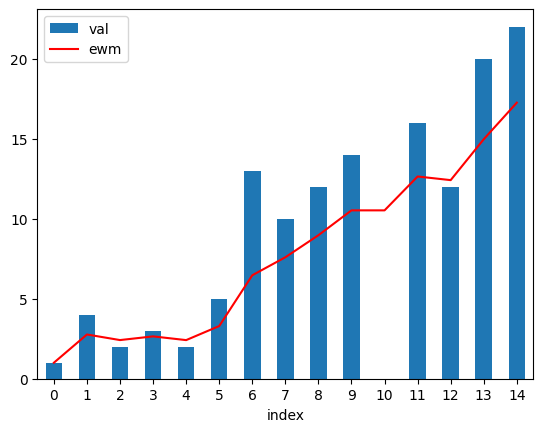

In [104]:
df2 = df.assign(ewm=df['val'].ewm(alpha=0.3).mean()) # val열에 ewm 메서드적용 후 df에 추가
ax = df.plot(kind='bar',x='index',y='val') # ax에 df의 bar chart 생성
ax2= df2.plot(kind='line',x='index', y='ewm', color='red', ax=ax) # ax2에 df2의 line chart 생성후 ax에 추가
plt.show() # 그래프 출력

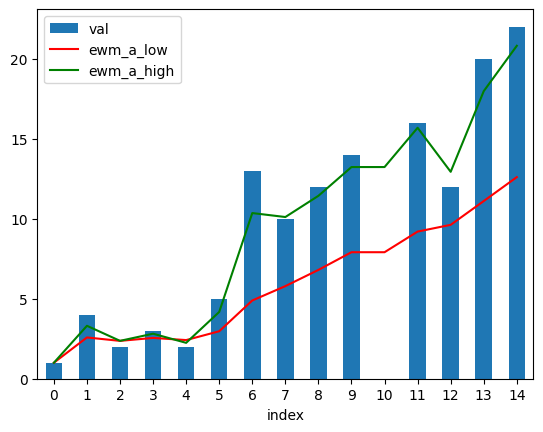

In [105]:
## alpha에 따른 차이
df2 = df.assign(ewm_a_low=df['val'].ewm(alpha=0.1).mean()) #alpha=0.1로 df2 생성
df3 = df.assign(ewm_a_high=df['val'].ewm(alpha=0.7).mean()) #alpha=0.7로 df3 생성
ax = df.plot(kind='bar',x='index',y='val') 
ax2= df2.plot(kind='line',x='index', y='ewm_a_low', color='red', ax=ax) # alpha=0.1 은 적색
ax3= df3.plot(kind='line',x='index', y='ewm_a_high', color='green', ax=ax) # alpha=0.7 은 녹색
plt.show()

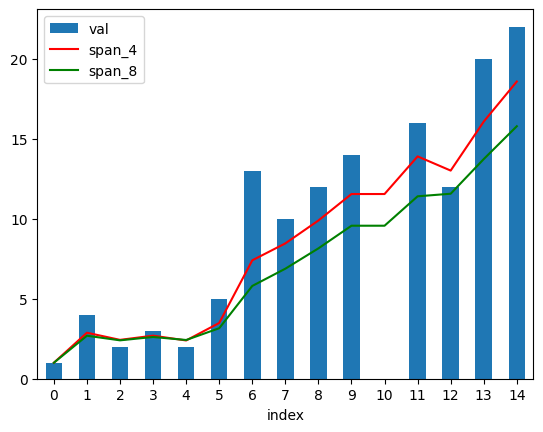

In [106]:
## span 인수의 사용
df2 = df.assign(span_4=df['val'].ewm(span=4).mean())
df3 = df.assign(span_8=df['val'].ewm(span=8).mean())
ax = df.plot(kind='bar',x='index',y='val')
ax2= df2.plot(kind='line',x='index', y='span_4', color='red', ax=ax)
ax3= df3.plot(kind='line',x='index', y='span_8', color='green', ax=ax)
plt.show()

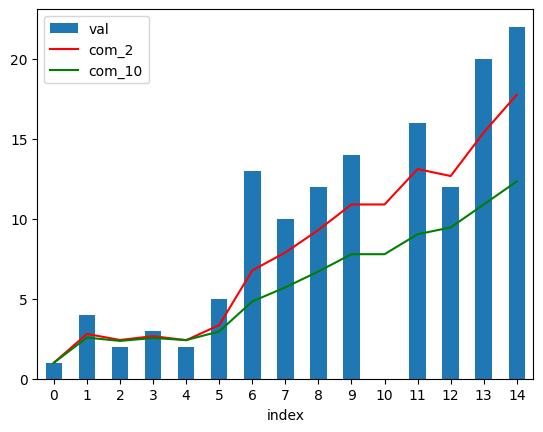

In [107]:
## com 인수의 사용
df2 = df.assign(com_2=df['val'].ewm(com=2).mean())
df3 = df.assign(com_10=df['val'].ewm(com=10).mean())
ax = df.plot(kind='bar',x='index',y='val')
ax2= df2.plot(kind='line',x='index', y='com_2', color='red', ax=ax)
ax3= df3.plot(kind='line',x='index', y='com_10', color='green', ax=ax)
plt.show()

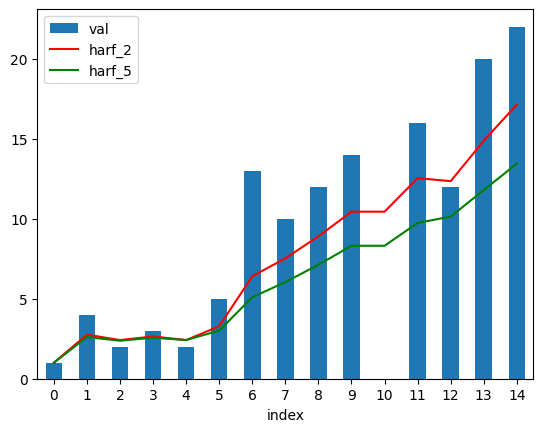

In [109]:
## healfife 인수의 사용

df2 = df.assign(harf_2=df['val'].ewm(halflife=2).mean())
df3 = df.assign(harf_5=df['val'].ewm(halflife=5).mean())
ax = df.plot(kind='bar',x='index',y='val')
ax2= df2.plot(kind='line',x='index', y='harf_2', color='red', ax=ax)
ax3= df3.plot(kind='line',x='index', y='harf_5', color='green', ax=ax)
plt.show()

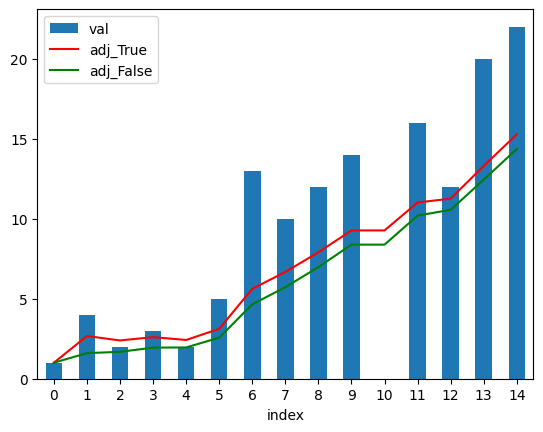

In [111]:
## adjust 인수의 사용

df2 = df.assign(adj_True=df['val'].ewm(alpha=0.2,adjust=True).mean())
df3 = df.assign(adj_False=df['val'].ewm(alpha=0.2,adjust=False).mean())
ax = df.plot(kind='bar',x='index',y='val')
ax2= df2.plot(kind='line',x='index', y='adj_True', color='red', ax=ax)
ax3= df3.plot(kind='line',x='index', y='adj_False', color='green', ax=ax)
plt.show()
